In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dlib : It is a modern C++ toolkit that contains ML-related algorithms and tools.

In [ ]:
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


face recognition The actual face recognition library can be installed after dlib.

In [ ]:
!pip install face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 25 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=4b1ed0e59070aaf60c7dbebcb69ad28f0eb0f12a292d3f66ca49dde68ff61592
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import face_recognition

In [ ]:
from google.colab.patches import cv2_imshow

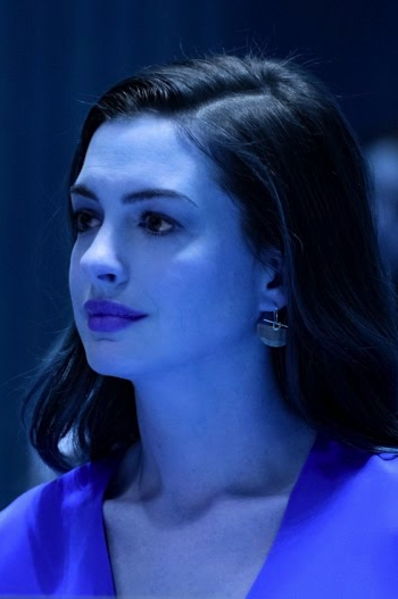

In [ ]:
img_BGR = face_recognition.load_image_file('/content/drive/MyDrive/14-celebrity-faces-dataset/face_recogni/Anne_Hathaway.png')
img_rgb = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
cv2_imshow(img_BGR)


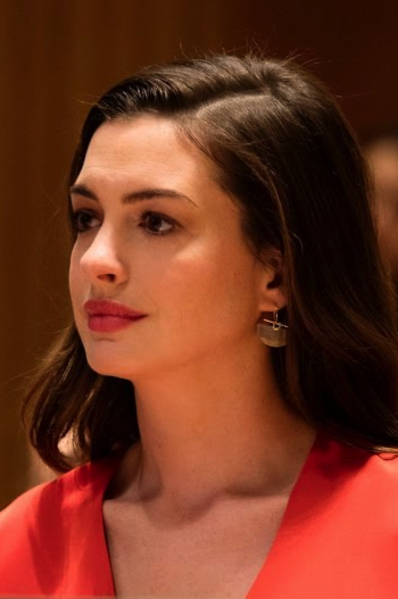

In [ ]:
cv2_imshow(img_rgb)

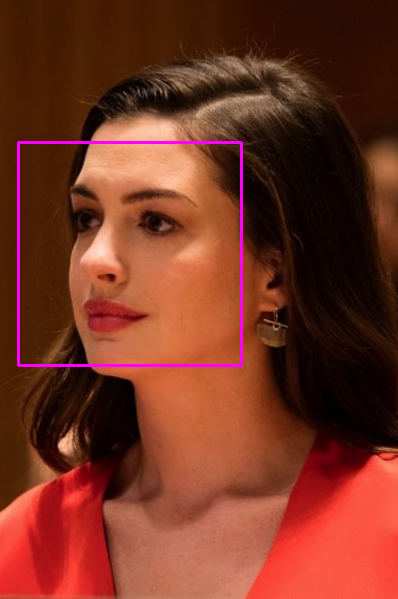

In [ ]:
img_modi=face_recognition.load_image_file('/content/drive/MyDrive/14-celebrity-faces-dataset/face_recogni/Anne_Hathaway.png')
img_modi_rgb = cv2.cvtColor(img_modi,cv2.COLOR_BGR2RGB)

face = face_recognition.face_locations(img_modi_rgb)[0]
copy = img_modi_rgb.copy()

cv2.rectangle(copy, (face[3], face[0]),(face[1], face[2]), (255,0,255), 2)
cv2_imshow(copy)


In [ ]:
cv2_imshow(img_modi_rgb)

In [ ]:
half = cv2.resize(img_modi_rgb, (0, 0), fx = 0.25, fy = 0.25)
half

array([[[  3,  31,  75],
        [  1,  29,  73],
        [  1,  29,  69],
        ...,
        [  0,  12,  43],
        [  0,  12,  43],
        [  0,  12,  43]],

       [[  3,  31,  75],
        [  1,  29,  73],
        [  1,  29,  69],
        ...,
        [  0,  13,  44],
        [  0,  13,  44],
        [  0,  13,  44]],

       [[  3,  31,  75],
        [  1,  28,  72],
        [  2,  30,  71],
        ...,
        [  0,  12,  43],
        [  0,  13,  44],
        [  0,  11,  42]],

       ...,

       [[ 40,  42, 232],
        [ 39,  40, 229],
        [ 40,  39, 226],
        ...,
        [ 60,  74, 252],
        [ 59,  72, 252],
        [ 57,  72, 252]],

       [[ 44,  54, 227],
        [ 45,  55, 228],
        [ 47,  55, 225],
        ...,
        [ 60,  75, 250],
        [ 59,  74, 249],
        [ 57,  73, 250]],

       [[ 54,  71, 187],
        [ 56,  73, 189],
        [ 55,  72, 188],
        ...,
        [ 62,  78, 250],
        [ 61,  77, 251],
        [ 59,  77, 252]]

In [ ]:
!pip install cmake face_recognition numpy opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import face_recognition
import cv2
import numpy as np
import os
import glob

In [ ]:
faces_encodings = []
faces_names = []
cur_direc = os.getcwd()
path = os.path.join(cur_direc, '/content/drive/MyDrive/14-celebrity-faces-dataset/face_recogni/')
list_of_files = [f for f in glob.glob(path+'*.jpg')]
number_files = len(list_of_files)
names = list_of_files.copy()

In [ ]:
names

['/content/drive/MyDrive/14-celebrity-faces-dataset/face_recogni/ben_afflek.jpg',
 '/content/drive/MyDrive/14-celebrity-faces-dataset/face_recogni/Arnold_Schwarzenegger.jpg']

In [ ]:
for i in range(number_files):
    globals()['image_{}'.format(i)] = face_recognition.load_image_file(list_of_files[i])
    globals()['image_encoding_{}'.format(i)] = face_recognition.face_encodings(globals()['image_{}'.format(i)])[0]
    faces_encodings.append(globals()['image_encoding_{}'.format(i)])
# Create array of known names
    names[i] = names[i].replace(cur_direc, "")
    faces_names.append(names[i])

In [ ]:
names

['/drive/MyDrive/14-celebrity-faces-dataset/face_recogni/ben_afflek.jpg',
 '/drive/MyDrive/14-celebrity-faces-dataset/face_recogni/Arnold_Schwarzenegger.jpg']

In [ ]:
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

In [ ]:
import face_recognition
known_image = face_recognition.load_image_file("/content/drive/MyDrive/14-celebrity-faces-dataset/face_recogni/Arnold_Schwarzenegger.jpg")
unknown_image = face_recognition.load_image_file("/content/drive/MyDrive/14-celebrity-faces-dataset/face_recogni/ben_afflek.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([biden_encoding], unknown_encoding)

In [ ]:
results

[False]

In [ ]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os

#get paths of each file in folder named Images
#Images here contains my data(folders of various persons)
imagePaths = list(paths.list_images('/content/drive/MyDrive/14-celebrity-faces-dataset/'))
knownEncodings = []
knownNames = []
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the person name from the image path
    name = imagePath.split(os.path.sep)[-2]
    print(name)
    # load the input image and convert it from BGR (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #Use Face_recognition to locate faces
    boxes = face_recognition.face_locations(rgb,model='hog')
    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)
    # loop over the encodings
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)
#save emcodings along with their names in dictionary data
data = {"encodings": knownEncodings, "names": knownNames}
#use pickle to save data into a file for later use
f = open("face_enc", "wb")
f.write(pickle.dumps(data))
f.close()

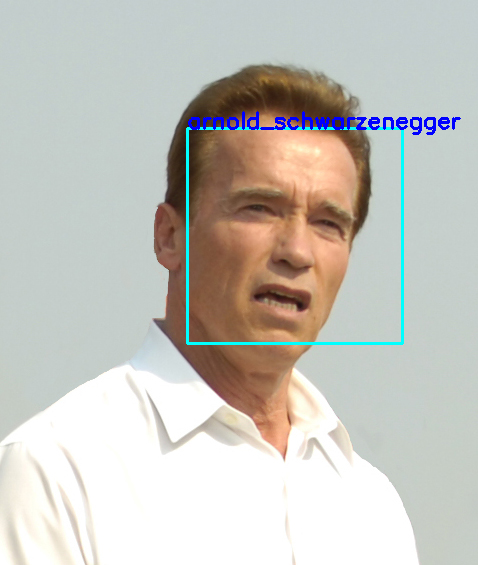

In [ ]:
import face_recognition
import imutils
import pickle
import time
import cv2
import os

#find path of xml file containing haarcascade file
cascPathface = os.path.dirname(
 cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
# load the harcaascade in the cascade classifier
faceCascade = cv2.CascadeClassifier(cascPathface)
# load the known faces and embeddings saved in last file
data = pickle.loads(open('face_enc', "rb").read())
#Find path to the image you want to detect face and pass it here
image = cv2.imread('/content/drive/MyDrive/14-celebrity-faces-dataset/face_recogni/Arnold_Schwarzenegger.jpg ')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#convert image to Greyscale for haarcascade
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(60, 60),
                                     flags=cv2.CASCADE_SCALE_IMAGE)

# the facial embeddings for face in input
encodings = face_recognition.face_encodings(rgb)
names = []
# loop over the facial embeddings incase
# we have multiple embeddings for multiple fcaes
for encoding in encodings:
    #Compare encodings with encodings in data["encodings"]
    #Matches contain array with boolean values and True for the embeddings it matches closely
    #and False for rest
    matches = face_recognition.compare_faces(data["encodings"],
    encoding)
    #set name =inknown if no encoding matches
    name = "Unknown"
    # check to see if we have found a match
    if True in matches:
        #Find positions at which we get True and store them
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {}
        # loop over the matched indexes and maintain a count for
        # each recognized face face
        for i in matchedIdxs:
            #Check the names at respective indexes we stored in matchedIdxs
            name = data["names"][i]
            #increase count for the name we got
            counts[name] = counts.get(name, 0) + 1
            #set name which has highest count
            name = max(counts, key=counts.get)


        # update the list of names
        names.append(name)
        # loop over the recognized faces
        for ((x, y, w, h), name) in zip(faces, names):
            # rescale the face coordinates
            # draw the predicted face name on the image
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)
            cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
             0.75, (255, 0, 0), 2)
    cv2_imshow(image)
    cv2.waitKey(0)